## Embedding in $d=1$ (one pattern, $p=1$)

~~Start the neurons close to the known fixed point $\xi^1_i$~~

Actually it looks like if there are enough neurons, we can just start them from zero

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from neurodyn import *

In [3]:
rnn = LowRankRNN.new_valentin(p=1, N=50_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True)
res = rnn.simulate(h0=np.zeros(rnn.N), t_span=(0, 40), dt_max=1, progress=True)

simulating LowRankRNN{N=50000, p=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:02<00:00]


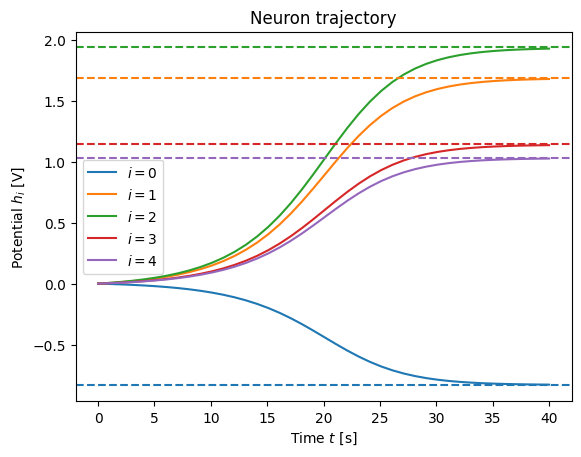

In [4]:
fig, ax = plot_neuron_trajectory(res)
for line, i in zip(ax.lines, range(5)):
	ax.axhline(rnn.F[i, 0], linestyle='--', color=line.get_color())

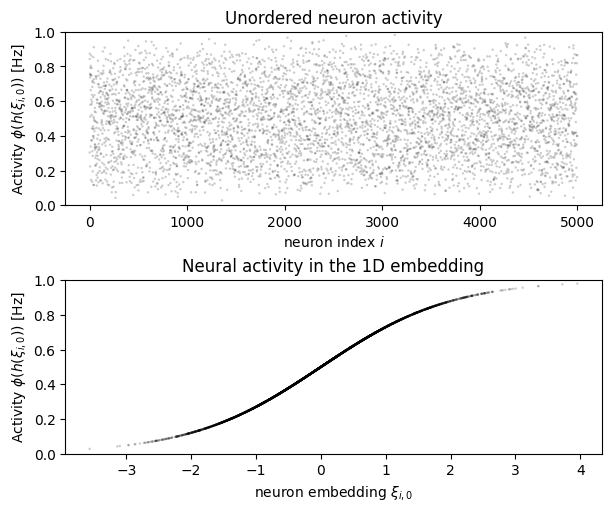

In [9]:
fig, ax = plt.subplots(figsize=(6, 5), nrows=2, constrained_layout=True)

Nmax = 5000
idt = -1
activity = rnn.phi(res.h[:Nmax, idt])
idx_mapping = np.arange(len(res.h[:Nmax, -1]))

ax[0].set_title('Unordered neuron activity')
# ax[0].stem(idx_mapping, activity)
ax[0].scatter(idx_mapping, activity, c='k', alpha=0.2, s=3, ec=None)
ax[0].set_xlabel('neuron index $i$')
ax[0].set_ylabel('Activity $\\phi(h(\\xi_{i,0}))$ [Hz]')
ax[0].set_ylim((0,1))

# at the fixed point, all neurons are in state Xi_i, so the activity follows Phi(Xi)
ax[1].set_title('Neural activity in the 1D embedding')
ax[1].scatter(rnn.F[:Nmax, 0], activity, c='k', alpha=0.2, s=3, ec=None)
ax[1].set_xlabel('neuron embedding $\\xi_{i,0}$')
ax[1].set_ylabel('Activity $\\phi(h(\\xi_{i,0}))$ [Hz]')
ax[1].set_ylim((0,1))

fig.savefig('../presentation/2023-04-20/embedding_d=1.png', transparent=True)
plt.show()

at the fixed point, all neurons are in state Xi_i, so the activity follows Phi(Xi)

In [10]:
rnn = LowRankRNN.new_valentin(p=1, N=50_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True)
res = rnn.simulate(h0=np.zeros(rnn.N), t_span=(0, 40), dt_max=1, progress=True)
animate1d(rnn, res, 'animations/embedding_d=1_h0=0_phi=sigmoid.mp4', Nmax=4000)

simulating LowRankRNN{N=50000, p=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:05<00:00]
100%|██████████| 46/46 [00:43<00:00,  1.06it/s]


In [11]:
# linear approximation to the sigmoid
rnn = LowRankRNN.new_valentin(p=1, N=100_000, phi=lambda x: linear(x, a=0.25, b=0.5), I_ext=zero, exclude_self_connections=True)
res = rnn.simulate(h0=np.zeros(rnn.N), t_span=(0, 1000), dt_max=10, progress=True)
animate1d(rnn, res, 'animations/embedding_d=1_h0=0_phi=linear.mp4', Nmax=4000, time_stride=6)

simulating LowRankRNN{N=100000, p=1, phi=<lambda>, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=1000.000 of 1000 [00:37<00:00]
100%|██████████| 53/53 [01:00<00:00,  1.13s/it]
